## Check out this [network](https://github.com/kentaroy47/vision-transformers-cifar10/blob/main/models/vit.py)

* Re-write this network such that it is similar to the network we wrote in the class

* All parameters are the same as the network we wrote

* Proceed to submit the assignment:

    > Share the model code and link to the model cost

    > Share the training logs

    > Share the gradcam images for 10 misclassified images


1.   [EVA8_API](https://github.com/ojhajayant/EVA8_API) is the main repo which is being cloned here to be able to run the main.py script with various user provided (or default) arg options.







In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar  3 07:11:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    50W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##  Install the EVA8 packages, hosted @ github

In [2]:

!pip install git+https://git@github.com/ojhajayant//EVA8_API.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/ojhajayant//EVA8_API.git to /tmp/pip-req-build-hoswnua4
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/ojhajayant//EVA8_API.git' /tmp/pip-req-build-hoswnua4
  Resolved https://****@github.com/ojhajayant//EVA8_API.git to commit 6e0d2bdbc22c3447e5f247690dbee3451db49c35
  Preparing metadata (setup.py) ... done
  Created wheel for EVA8-API: filename=EVA8_API-0.0.0-py3-none-any.whl size=30468 sha256=67faf18a13ee9141d6cb1c380c9619da2bdf6c16f6726096ed1bde512a3a419e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ag2hge19/wheels/5a/75/07/3896c73523adfee1c7bbad204b8ebeba4397d8209609d9a168
Successfully built EVA8-API


In [3]:

!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [4]:
!pip install albumentations --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [5]:


!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=cc4347f1a5361c185156d108ab85c3a1d667d945687447fb7c140f8e1de43e69
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [6]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 1.8 MB/s eta 0:00:00


In [7]:
!git clone https://git@github.com/ojhajayant//EVA8_API.git

Cloning into 'EVA8_API'...
remote: Enumerating objects: 493, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 493 (delta 69), reused 11 (delta 11), pack-reused 388
Receiving objects: 100% (493/493), 216.33 KiB | 2.85 MiB/s, done.
Resolving deltas: 100% (316/316), done.


In [8]:
%cd EVA8_API




/content/EVA8_API


In [9]:

%pwd

'/content/EVA8_API'

### Run the main.py script to enable the LR Range test







CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 1e-05
	end_lr : 1.0
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


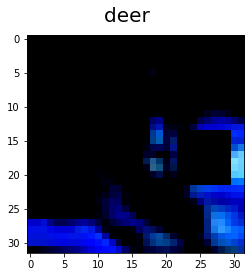

Here are a few samples BEFORE TRANSFORMS APPLIED:


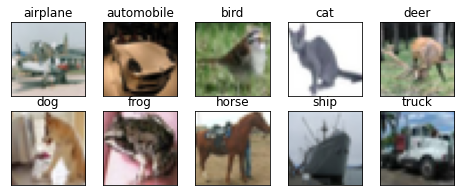

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

  0%|          | 0/980 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (for Least Loss value: 1.5635207605047063 to be used: 0.7194439016401214
LR suggestion: steepest gradient
Suggested LR: 7.01E-02


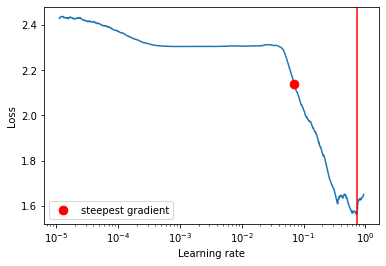

best_lr is 0.7194439016401214


<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
%run /content/EVA8_API/main.py --cmd lr_find --init_lr 1e-5 --end_lr 1 --lr_range_test_epochs 10

CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.00701
	end_lr : 0.701
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Tra

torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


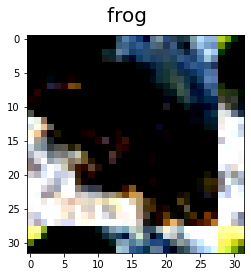

Here are a few samples BEFORE TRANSFORMS APPLIED:


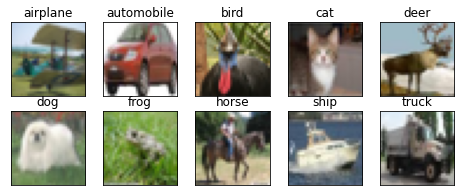

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

  0%|          | 0/980 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (for Least Loss value: 1.1652024143022581 to be used: 0.30487692484112927
LR suggestion: steepest gradient
Suggested LR: 6.70E-02


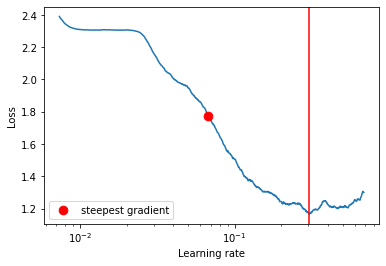

best_lr is 0.30487692484112927


<Figure size 432x288 with 0 Axes>

In [13]:
%matplotlib inline
%run /content/EVA8_API/main.py --cmd lr_find --init_lr 7.01E-03 --end_lr 7.01E-01 --lr_range_test_epochs 10

### With the best_lr found from above "lr_find" run, model should be trained by running the main.py script under "train" command (but was not able to reproduce a best_lr 0.03 for which model performed better, here putting the same as default rather than taking the one found out above)



CUDA Available? True

	Here are the different args values for this run:
	cmd : train
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


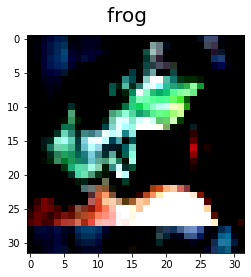

Here are a few samples BEFORE TRANSFORMS APPLIED:


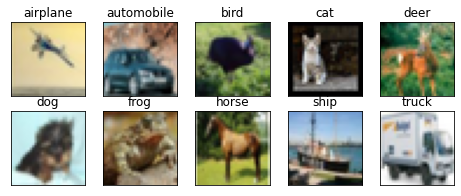

Here are a few samples AFTER TRANSFORMS APPLIED:


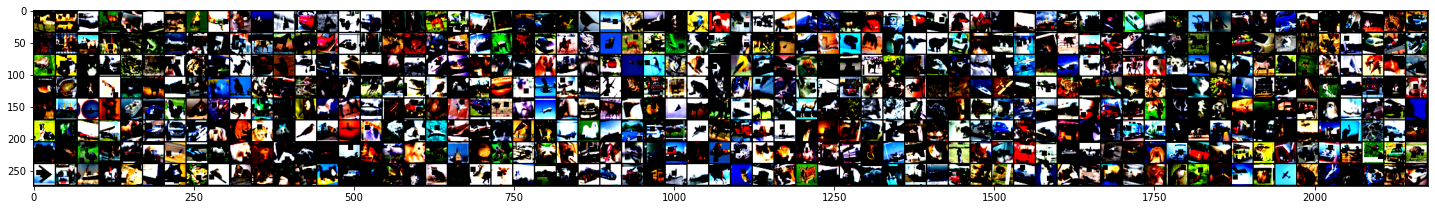

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

Loss=1.7556650638580322 Batch_id=97 Accuracy=28.43: 100%|██████████| 98/98 [00:06<00:00, 15.89it/s]



Test set: Average loss: 0.0032, Accuracy: 4132/10000 (41.32%)

validation-accuracy improved from 0 to 41.32, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-41.32.h5
EPOCH: 2
LR: 0.008411042944785275


Loss=1.7271416187286377 Batch_id=97 Accuracy=40.66: 100%|██████████| 98/98 [00:05<00:00, 17.27it/s]



Test set: Average loss: 0.0029, Accuracy: 4657/10000 (46.57%)

validation-accuracy improved from 41.32 to 46.57, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-2_L1-1_L2-0_val_acc-46.57.h5
EPOCH: 3
LR: 0.01382208588957055


Loss=1.7119848728179932 Batch_id=97 Accuracy=43.20: 100%|██████████| 98/98 [00:05<00:00, 17.55it/s]



Test set: Average loss: 0.0029, Accuracy: 4641/10000 (46.41%)

EPOCH: 4
LR: 0.019233128834355826


Loss=1.652485966682434 Batch_id=97 Accuracy=44.32: 100%|██████████| 98/98 [00:05<00:00, 17.35it/s]



Test set: Average loss: 0.0029, Accuracy: 4857/10000 (48.57%)

validation-accuracy improved from 46.57 to 48.57, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-4_L1-1_L2-0_val_acc-48.57.h5
EPOCH: 5
LR: 0.024644171779141102


Loss=1.5584139823913574 Batch_id=97 Accuracy=44.18: 100%|██████████| 98/98 [00:05<00:00, 17.44it/s]



Test set: Average loss: 0.0027, Accuracy: 5116/10000 (51.16%)

validation-accuracy improved from 48.57 to 51.16, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-5_L1-1_L2-0_val_acc-51.16.h5
EPOCH: 6
LR: 0.02998404940923738


Loss=1.5917167663574219 Batch_id=97 Accuracy=45.73: 100%|██████████| 98/98 [00:05<00:00, 17.33it/s]



Test set: Average loss: 0.0029, Accuracy: 4782/10000 (47.82%)

EPOCH: 7
LR: 0.028420891514500536


Loss=1.6352331638336182 Batch_id=97 Accuracy=47.01: 100%|██████████| 98/98 [00:05<00:00, 16.92it/s]



Test set: Average loss: 0.0026, Accuracy: 5197/10000 (51.97%)

validation-accuracy improved from 51.16 to 51.97, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-7_L1-1_L2-0_val_acc-51.97.h5
EPOCH: 8
LR: 0.026857733619763693


Loss=1.5327650308609009 Batch_id=97 Accuracy=48.53: 100%|██████████| 98/98 [00:05<00:00, 17.03it/s]



Test set: Average loss: 0.0027, Accuracy: 5232/10000 (52.32%)

validation-accuracy improved from 51.97 to 52.32, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-8_L1-1_L2-0_val_acc-52.32.h5
EPOCH: 9
LR: 0.02529457572502685


Loss=1.5700397491455078 Batch_id=97 Accuracy=50.31: 100%|██████████| 98/98 [00:05<00:00, 17.54it/s]



Test set: Average loss: 0.0025, Accuracy: 5513/10000 (55.13%)

validation-accuracy improved from 52.32 to 55.13, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-9_L1-1_L2-0_val_acc-55.13.h5
EPOCH: 10
LR: 0.02373141783029001


Loss=1.511792540550232 Batch_id=97 Accuracy=50.74: 100%|██████████| 98/98 [00:05<00:00, 17.31it/s]



Test set: Average loss: 0.0024, Accuracy: 5609/10000 (56.09%)

validation-accuracy improved from 55.13 to 56.09, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-10_L1-1_L2-0_val_acc-56.09.h5
EPOCH: 11
LR: 0.022168259935553165


Loss=1.4840112924575806 Batch_id=97 Accuracy=51.93: 100%|██████████| 98/98 [00:05<00:00, 17.30it/s]



Test set: Average loss: 0.0024, Accuracy: 5612/10000 (56.12%)

validation-accuracy improved from 56.09 to 56.12, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-11_L1-1_L2-0_val_acc-56.12.h5
EPOCH: 12
LR: 0.020605102040816326


Loss=1.4405205249786377 Batch_id=97 Accuracy=52.44: 100%|██████████| 98/98 [00:05<00:00, 17.59it/s]



Test set: Average loss: 0.0024, Accuracy: 5694/10000 (56.94%)

validation-accuracy improved from 56.12 to 56.94, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-12_L1-1_L2-0_val_acc-56.94.h5
EPOCH: 13
LR: 0.019041944146079483


Loss=1.4468913078308105 Batch_id=97 Accuracy=53.69: 100%|██████████| 98/98 [00:05<00:00, 17.30it/s]



Test set: Average loss: 0.0023, Accuracy: 5888/10000 (58.88%)

validation-accuracy improved from 56.94 to 58.88, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-13_L1-1_L2-0_val_acc-58.88.h5
EPOCH: 14
LR: 0.017478786251342644


Loss=1.3786044120788574 Batch_id=97 Accuracy=54.91: 100%|██████████| 98/98 [00:05<00:00, 17.36it/s]



Test set: Average loss: 0.0022, Accuracy: 6009/10000 (60.09%)

validation-accuracy improved from 58.88 to 60.09, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-14_L1-1_L2-0_val_acc-60.09.h5
EPOCH: 15
LR: 0.0159156283566058


Loss=1.3809154033660889 Batch_id=97 Accuracy=55.58: 100%|██████████| 98/98 [00:05<00:00, 17.39it/s]



Test set: Average loss: 0.0022, Accuracy: 6098/10000 (60.98%)

validation-accuracy improved from 60.09 to 60.98, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-15_L1-1_L2-0_val_acc-60.98.h5
EPOCH: 16
LR: 0.014352470461868959


Loss=1.3026299476623535 Batch_id=97 Accuracy=56.31: 100%|██████████| 98/98 [00:05<00:00, 17.49it/s]



Test set: Average loss: 0.0021, Accuracy: 6182/10000 (61.82%)

validation-accuracy improved from 60.98 to 61.82, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-16_L1-1_L2-0_val_acc-61.82.h5
EPOCH: 17
LR: 0.01278931256713212


Loss=1.2449743747711182 Batch_id=97 Accuracy=57.38: 100%|██████████| 98/98 [00:05<00:00, 17.08it/s]



Test set: Average loss: 0.0021, Accuracy: 6086/10000 (60.86%)

EPOCH: 18
LR: 0.011226154672395273


Loss=1.28666090965271 Batch_id=97 Accuracy=57.65: 100%|██████████| 98/98 [00:05<00:00, 17.48it/s]



Test set: Average loss: 0.0022, Accuracy: 6055/10000 (60.55%)

EPOCH: 19
LR: 0.00966299677765843


Loss=1.2336550951004028 Batch_id=97 Accuracy=58.61: 100%|██████████| 98/98 [00:05<00:00, 16.97it/s]



Test set: Average loss: 0.0020, Accuracy: 6298/10000 (62.98%)

validation-accuracy improved from 61.82 to 62.98, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-19_L1-1_L2-0_val_acc-62.98.h5
EPOCH: 20
LR: 0.008099838882921592


Loss=1.1878244876861572 Batch_id=97 Accuracy=59.38: 100%|██████████| 98/98 [00:05<00:00, 17.14it/s]



Test set: Average loss: 0.0020, Accuracy: 6476/10000 (64.76%)

validation-accuracy improved from 62.98 to 64.76, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-64.76.h5
EPOCH: 21
LR: 0.006536680988184749


Loss=1.213541865348816 Batch_id=97 Accuracy=60.41: 100%|██████████| 98/98 [00:05<00:00, 17.13it/s]



Test set: Average loss: 0.0020, Accuracy: 6444/10000 (64.44%)

EPOCH: 22
LR: 0.004973523093447906


Loss=1.229129433631897 Batch_id=97 Accuracy=61.00: 100%|██████████| 98/98 [00:05<00:00, 16.83it/s]



Test set: Average loss: 0.0019, Accuracy: 6613/10000 (66.13%)

validation-accuracy improved from 64.76 to 66.13, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-22_L1-1_L2-0_val_acc-66.13.h5
EPOCH: 23
LR: 0.0034103651987110635


Loss=1.2032792568206787 Batch_id=97 Accuracy=61.70: 100%|██████████| 98/98 [00:05<00:00, 17.25it/s]



Test set: Average loss: 0.0019, Accuracy: 6617/10000 (66.17%)

validation-accuracy improved from 66.13 to 66.17, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-23_L1-1_L2-0_val_acc-66.17.h5
EPOCH: 24
LR: 0.0018472073039742243


Loss=1.0314149856567383 Batch_id=97 Accuracy=62.46: 100%|██████████| 98/98 [00:05<00:00, 17.05it/s]



Test set: Average loss: 0.0018, Accuracy: 6678/10000 (66.78%)

validation-accuracy improved from 66.17 to 66.78, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-66.78.h5


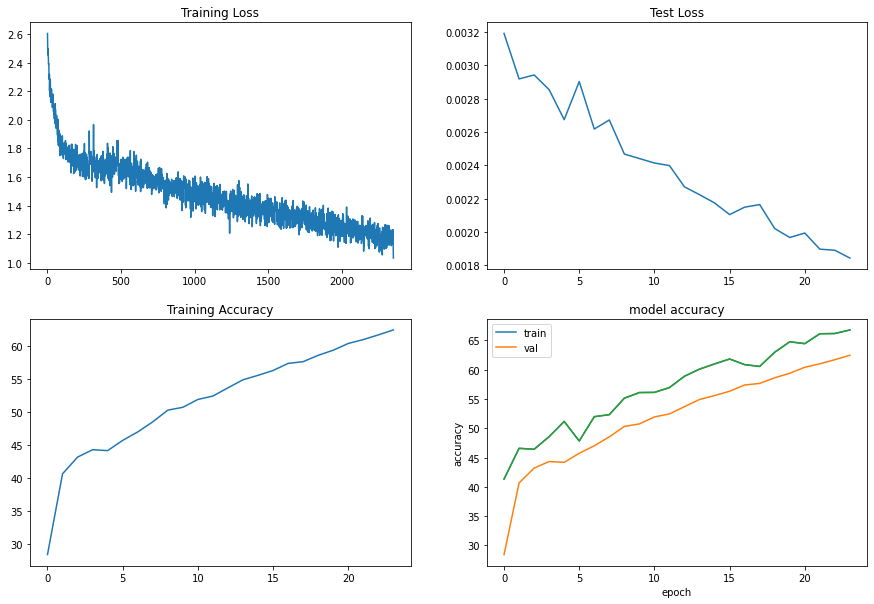

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd train --L1=True

### With the best_model found from above "train" run, saved best model above: CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-66.78.h5 is loaded to get confusion matrix etc.



CUDA Available? True

	Here are the different args values for this run:
	cmd : test
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model : CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-66.78.h5
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verif

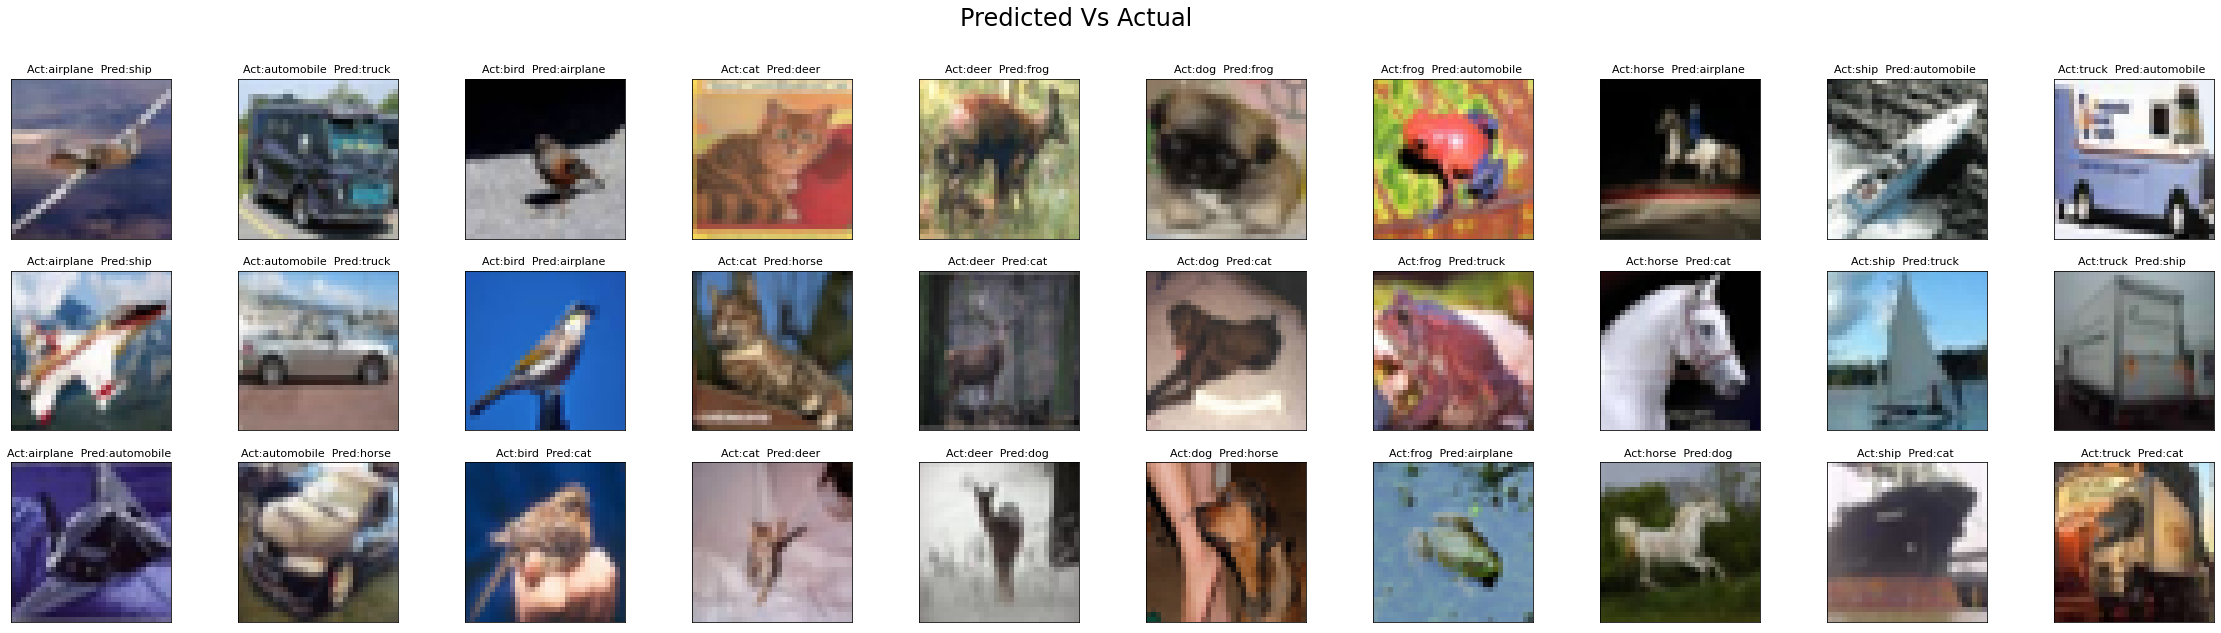



		The misclassified images with gradcam for this model are:


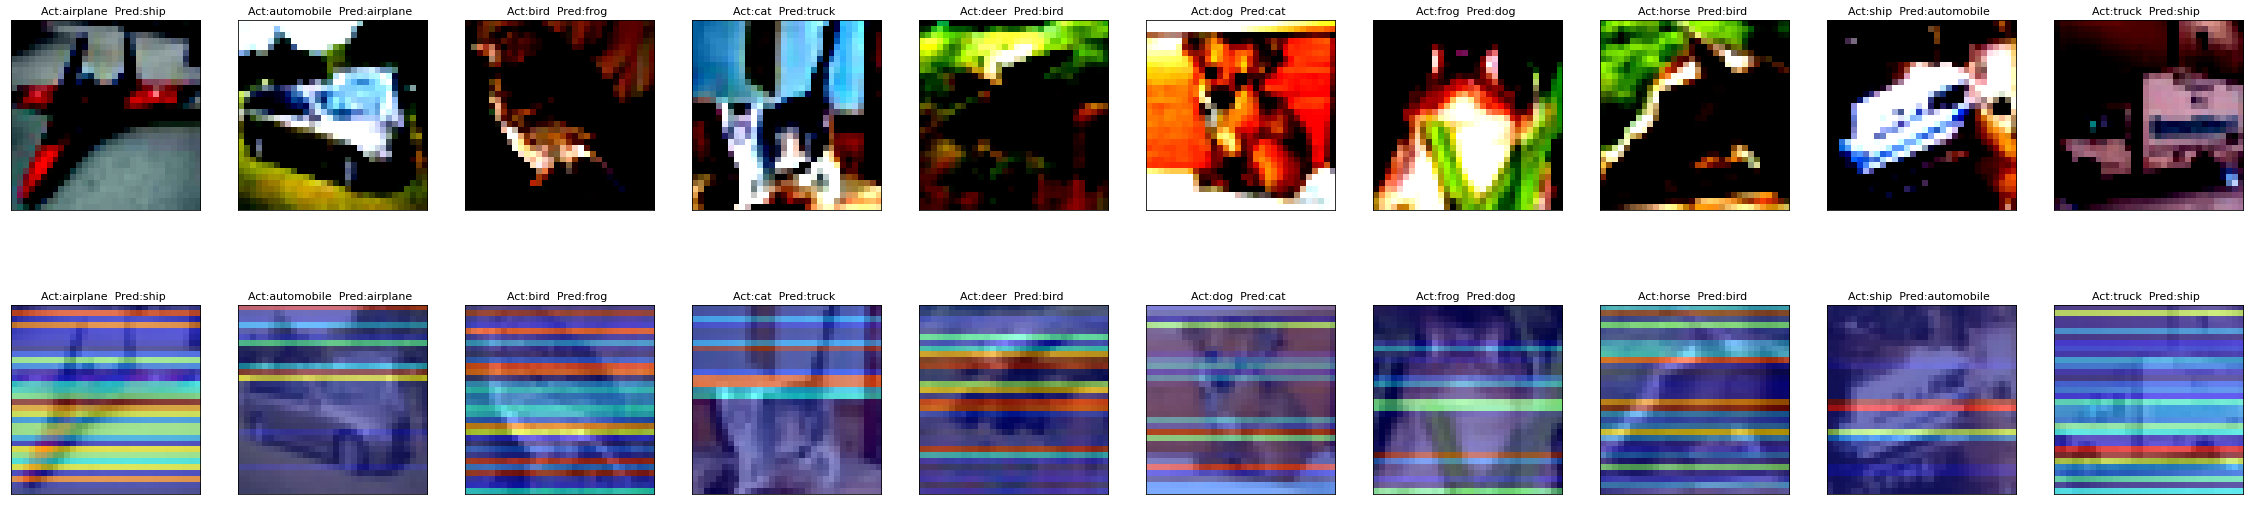

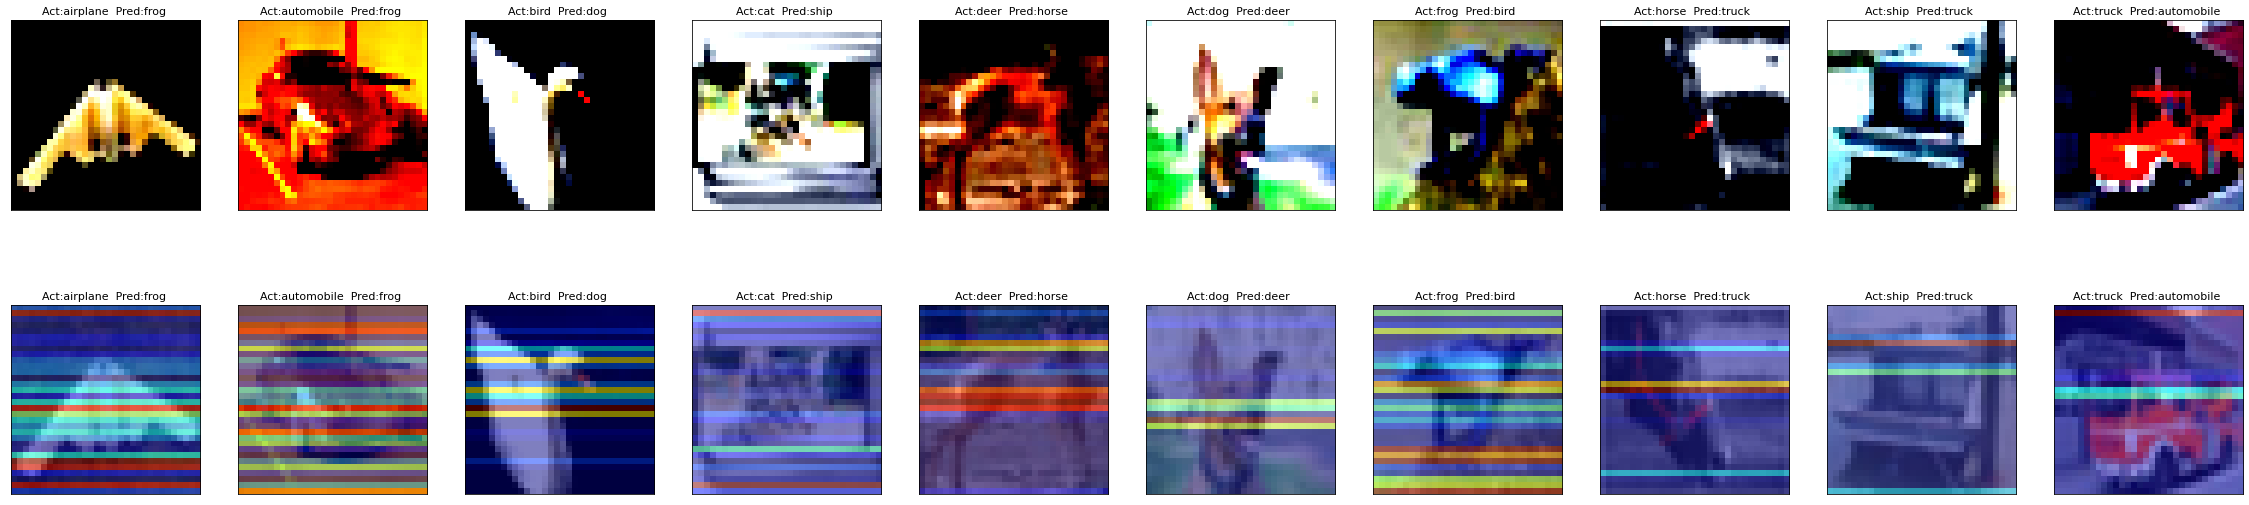

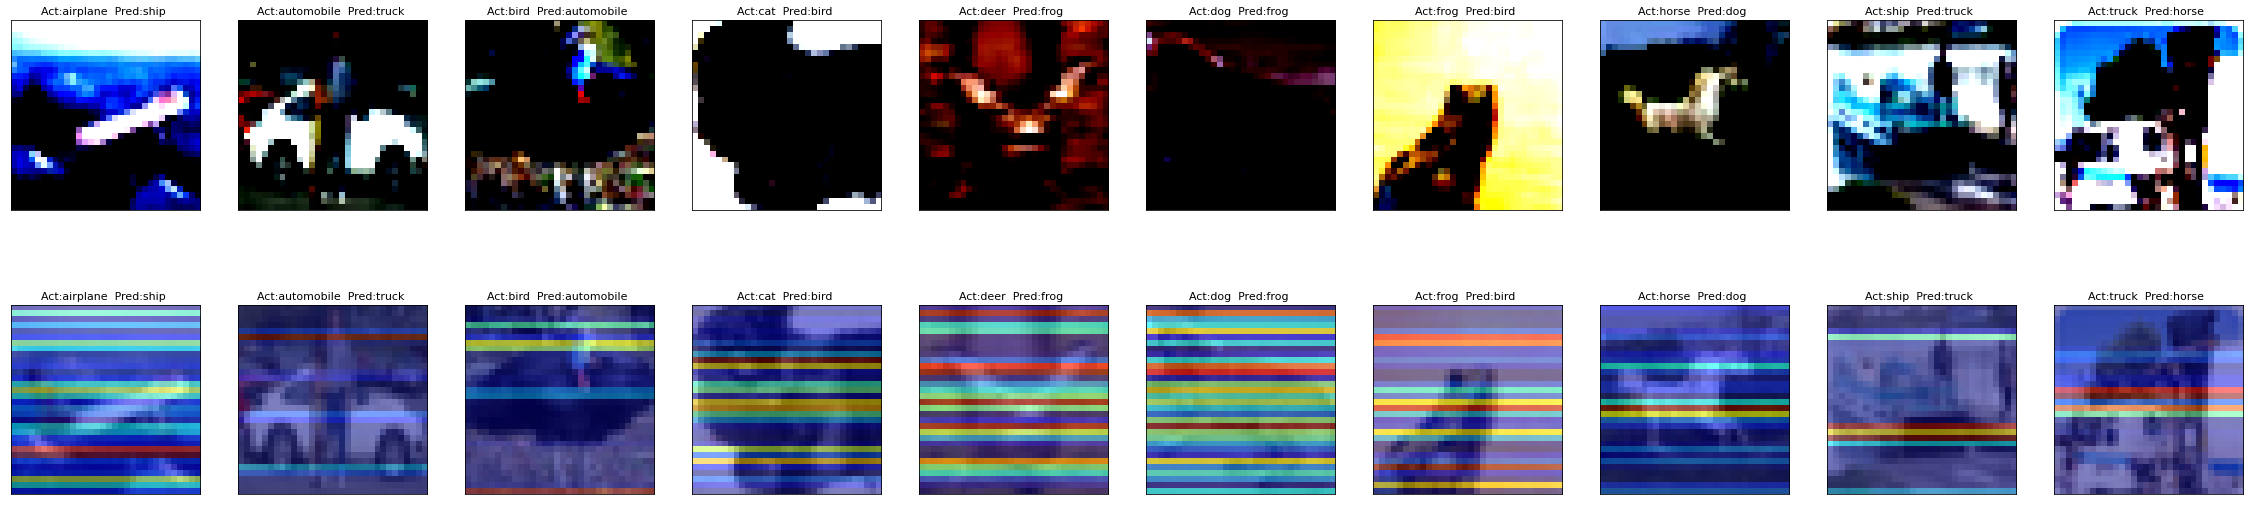

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd test --best_model CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-66.78.h5